In [17]:
import sqlite3
conn=sqlite3.connect("sales_data.db")
cursor=conn.cursor()
cursor.execute("drop table IF EXISTS Shop_sales") 

In [19]:
import sqlite3
conn=sqlite3.connect("sales_data.db")
cursor=conn.cursor()cursor.execute('create table Shop_sales(id integer primary key,product text,quantity integer, price real)')
sales_data = [('T-shirts',30,200),('Skirts', 50,250),('Formal pants',15,2000),('Socks',20,150),('Lounge wear',30,400),('Accesories',60,200)]
cursor.executemany('INSERT INTO Shop_sales (product, quantity, price) VALUES (?, ?, ?)', sales_data)
conn.commit()
conn.close()
print("Database and table created")

Database and table created


In [21]:
import pandas as pd
conn = sqlite3.connect("sales_data.db")
query = "SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue FROM Shop_sales GROUP BY product"
df = pd.read_sql_query(query, conn)

#results
print("sales summary:\n",df)     

sales summary:
         product  total_qty  revenue
0    Accesories         60  12000.0
1  Formal pants         15  30000.0
2   Lounge wear         30  12000.0
3        Skirts         50  12500.0
4         Socks         20   3000.0
5      T-shirts         30   6000.0


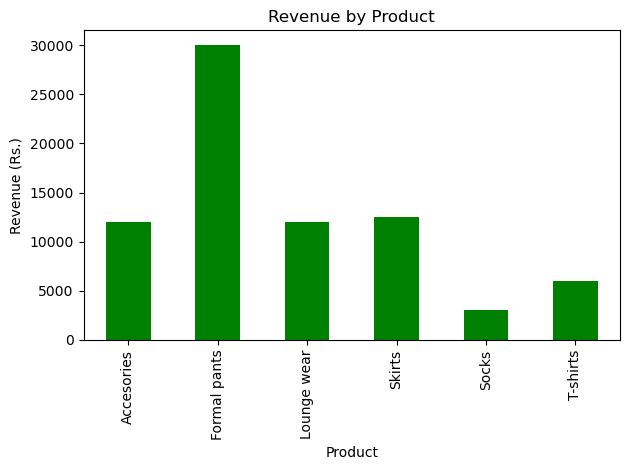

In [27]:
import matplotlib.pyplot as plt
# bar chart for revenue by product
df.plot(kind='bar', x='product', y='revenue',legend=False,color='green')
plt.title("Revenue by Product")
plt.ylabel("Revenue (Rs.)")
plt.xlabel("Product")
plt.tight_layout()
plt.show()